In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [93]:
df = pd.read_csv("C:/Users/samyh/Desktop/diabetes.csv")

In [94]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Preprocessing

In [96]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Outcome'], random_state=42)

In [98]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

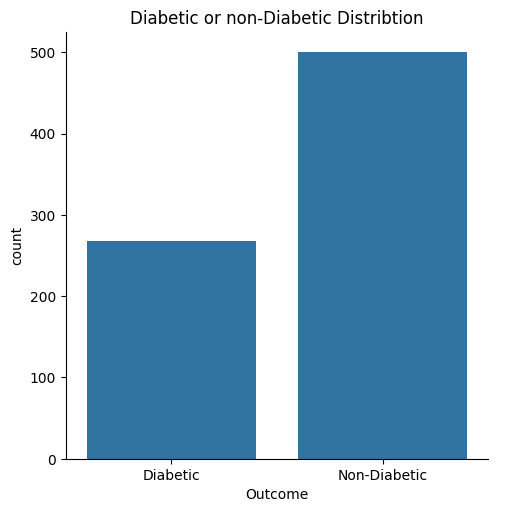

In [99]:
df["Outcome"] = np.where(df["Outcome"] == 0, "Non-Diabetic", "Diabetic")
sns.catplot(x="Outcome", data=df, kind="count")
plt.title("Diabetic or non-Diabetic Distribtion")
plt.show()

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Classification report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## Logistic Regression charts

Text(0.5, 1.0, 'Probability Distribution')

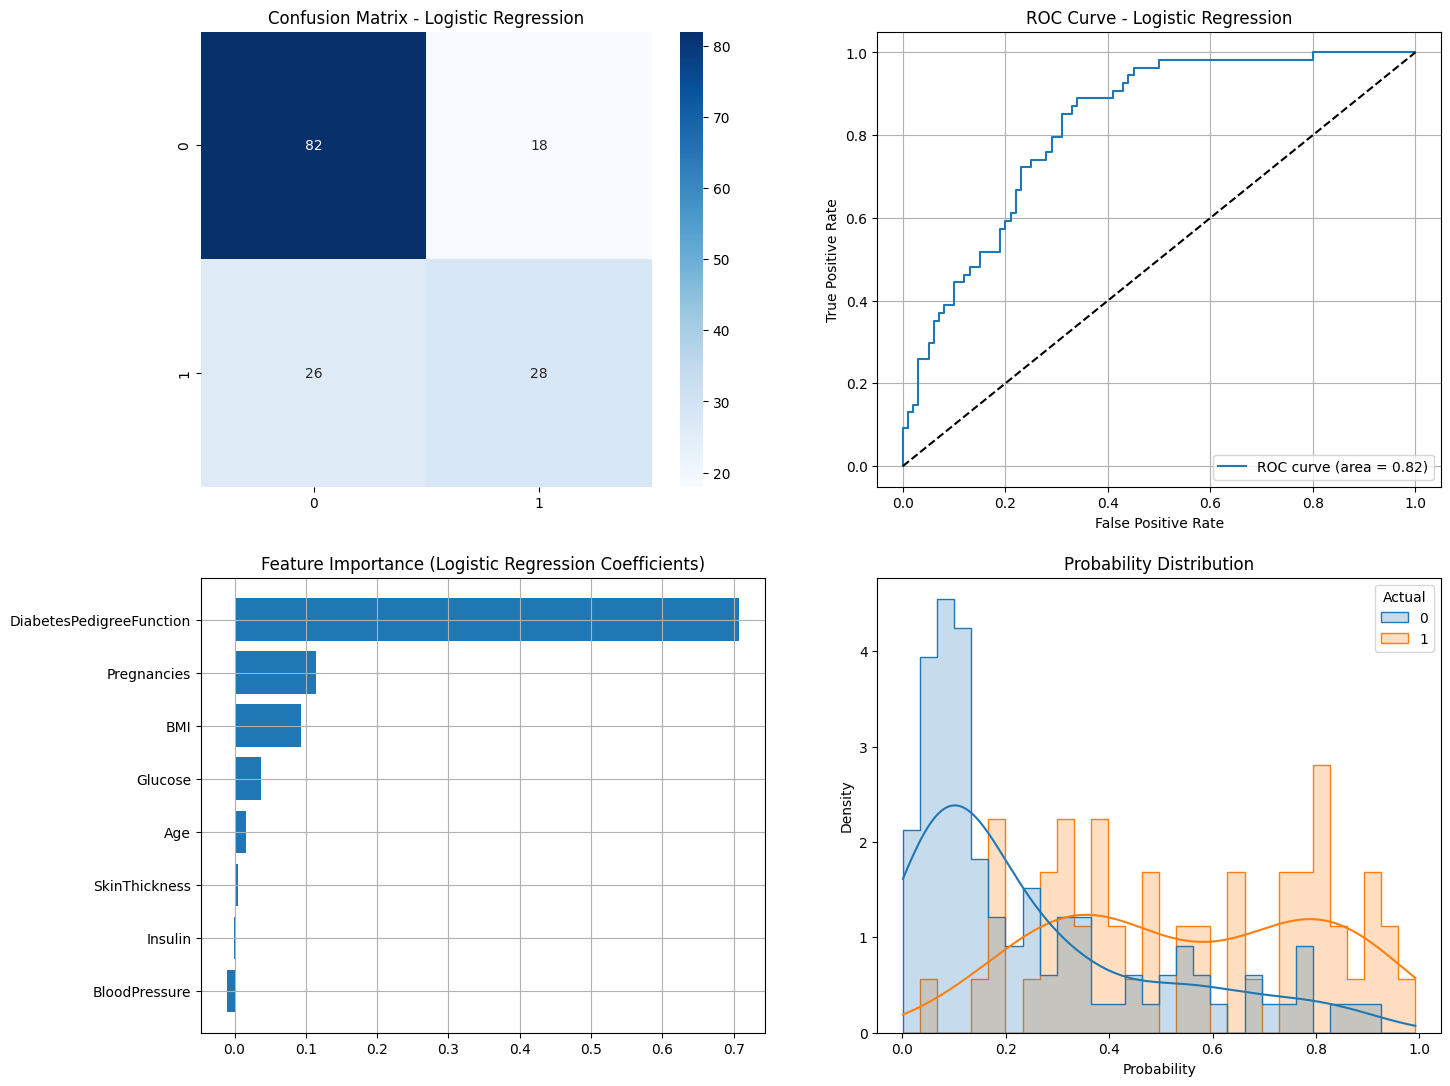

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")

#ROC plot
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_reg)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Logistic Regression")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
coefs = log_reg.coef_[0]
features = X.columns  
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
coef_df = coef_df.sort_values(by='Coefficient')
axes[2].barh(coef_df['Feature'], coef_df['Coefficient'])
axes[2].set_title("Feature Importance (Logistic Regression Coefficients)")
axes[2].grid(True)


# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_log_reg, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')



# Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)


print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred_naive_bayes))


Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



## Naive Bayes Charts

Text(0.5, 1.0, 'Probability Distribution')

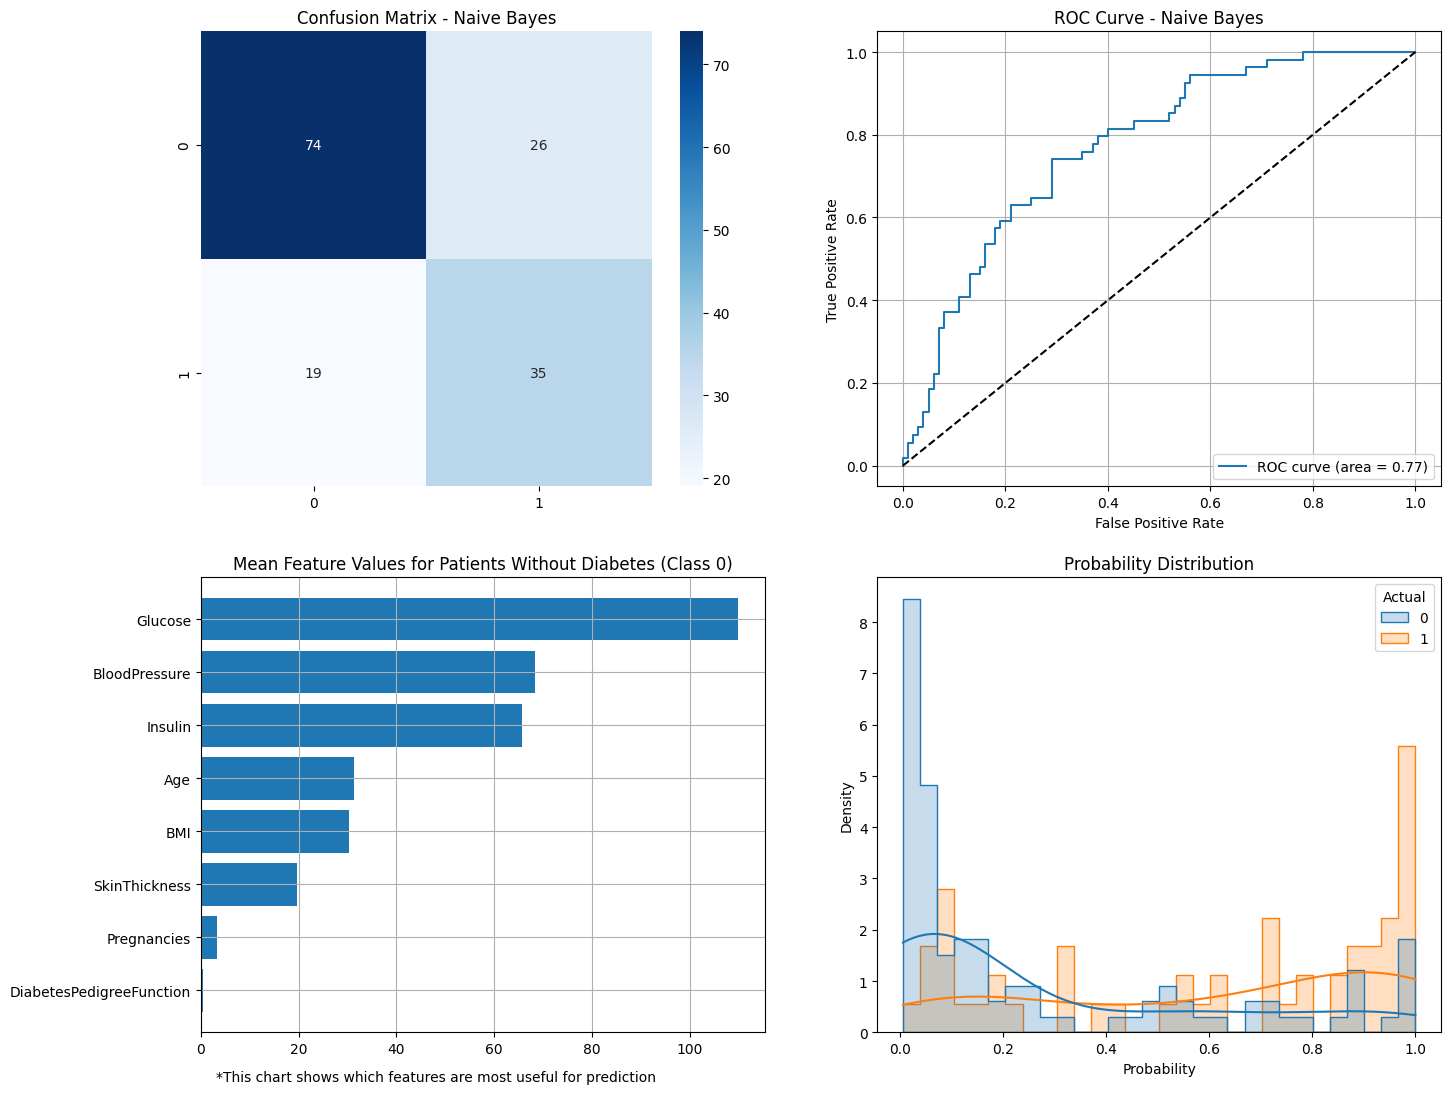

In [105]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#Confusion matrix heatmap plot
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Naive Bayes")

#ROC plot
y_prob_naive_bayes = naive_bayes.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_naive_bayes)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Naive Bayes")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance 
means = naive_bayes.theta_[0] 
sorted_indices = np.argsort(means)
stds = np.sqrt(naive_bayes.var_[0]) 
features = X_train.columns
ordered_features = features[sorted_indices]
ordered_means = means[sorted_indices]
axes[2].barh(ordered_features, ordered_means)
axes[2].set_title("Mean Feature Values for Patients Without Diabetes (Class 0)")
explanation = "*This chart shows which features are most useful for prediction"
axes[2].text(3, -1.5, explanation, ha='left', va='top', wrap=True, fontsize=10)
axes[2].grid(True)





# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_naive_bayes, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

print("Classification report for KNN:\n", classification_report(y_test, y_pred_KNN))

Classification report for KNN:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



### Used Scaled Data KNN

In [108]:
KNN.fit(X_train_scaled, y_train)
y_pred_KNN_scaled = KNN.predict(X_test_scaled)

cm_KNN_scaled = confusion_matrix(y_test, y_pred_KNN_scaled)

print("Classification report for KNN_Scaled:\n", classification_report(y_test, y_pred_KNN_scaled))

Classification report for KNN_Scaled:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.57      0.54      0.55        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



# KNN Charts

Text(0.5, 1.0, 'Probability Distribution KNN SCALED')

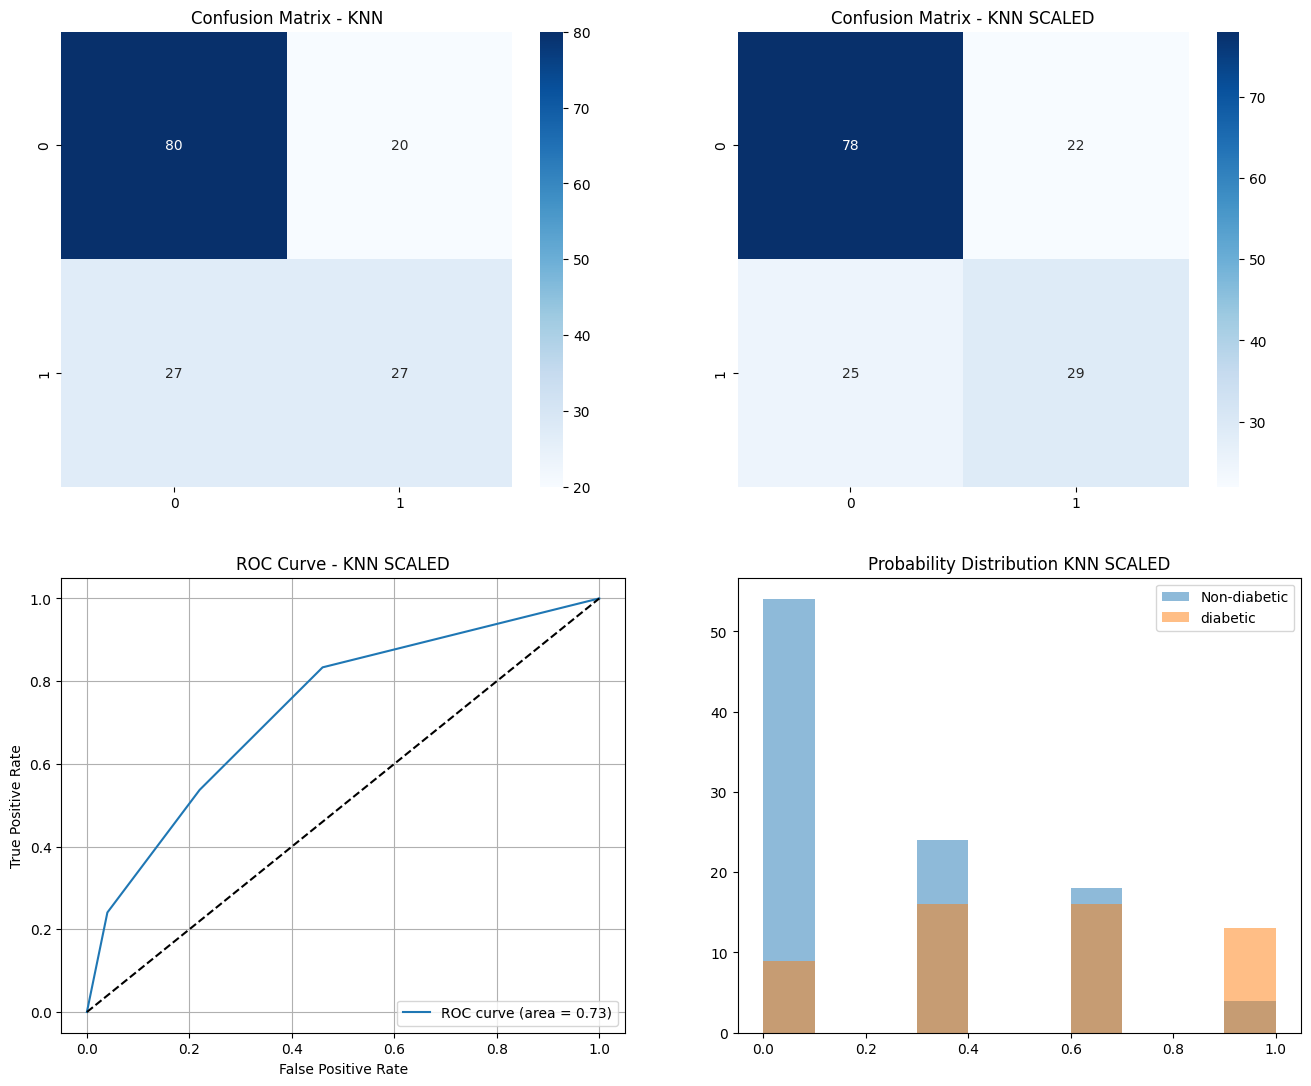

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - KNN")


sns.heatmap(cm_KNN_scaled, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - KNN SCALED")

#ROC plot
y_prob_KNN = KNN.predict_proba(X_test_scaled)[:, 1]                 # Use Feature Scaling (Critical for KNN) 
fpr, tpr, thresholds = roc_curve(y_test, y_prob_KNN)
roc_auc = auc(fpr, tpr)
axes[2].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[2].plot([0, 1], [0, 1], "k--")  
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve - KNN SCALED")
axes[2].legend(loc="lower right")
axes[2].grid(True)

#probability
axes[3].hist(y_prob_KNN[y_test==0], alpha=0.5, label='Non-diabetic')
axes[3].hist(y_prob_KNN[y_test==1], alpha=0.5, label='diabetic')
axes[3].legend()
axes[3].set_title('Probability Distribution KNN SCALED')


# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [111]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Classification report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



# Decision Tree Charts

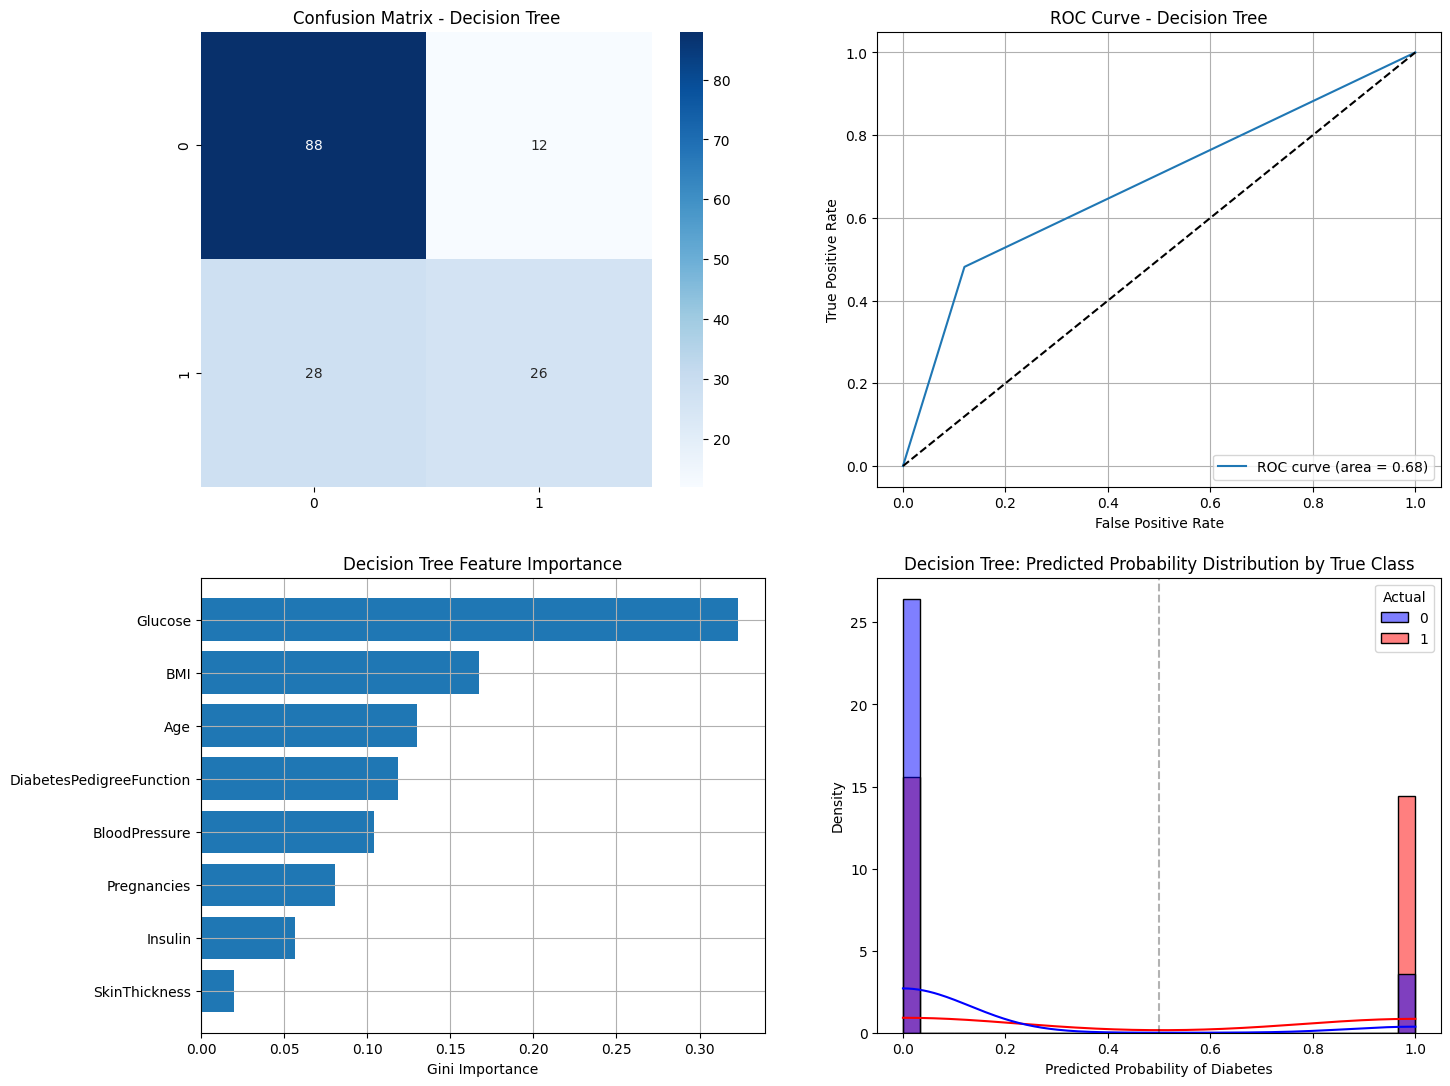

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Decision Tree")

#ROC plot
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Decision Tree")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance')

axes[2].barh(importance['Feature'], importance['Importance'], color='#1f77b4')
axes[2].set_title('Decision Tree Feature Importance')
axes[2].set_xlabel('Gini Importance')
axes[2].grid(True)



# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_dt, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, stat='density', common_norm=False,
    palette={0: 'blue', 1: 'red'}
)
axes[3].set_title('Decision Tree: Predicted Probability Distribution by True Class')
axes[3].set_xlabel('Predicted Probability of Diabetes')
axes[3].axvline(0.5, color='black', linestyle='--', alpha=0.3)
 

# Random Forrest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Classification report for Random Forrest:\n", classification_report(y_test, y_pred_rf))

Classification report for Random Forrest:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



## Random Foresr Charts

Text(0.5, 1.0, 'Probability Distribution')

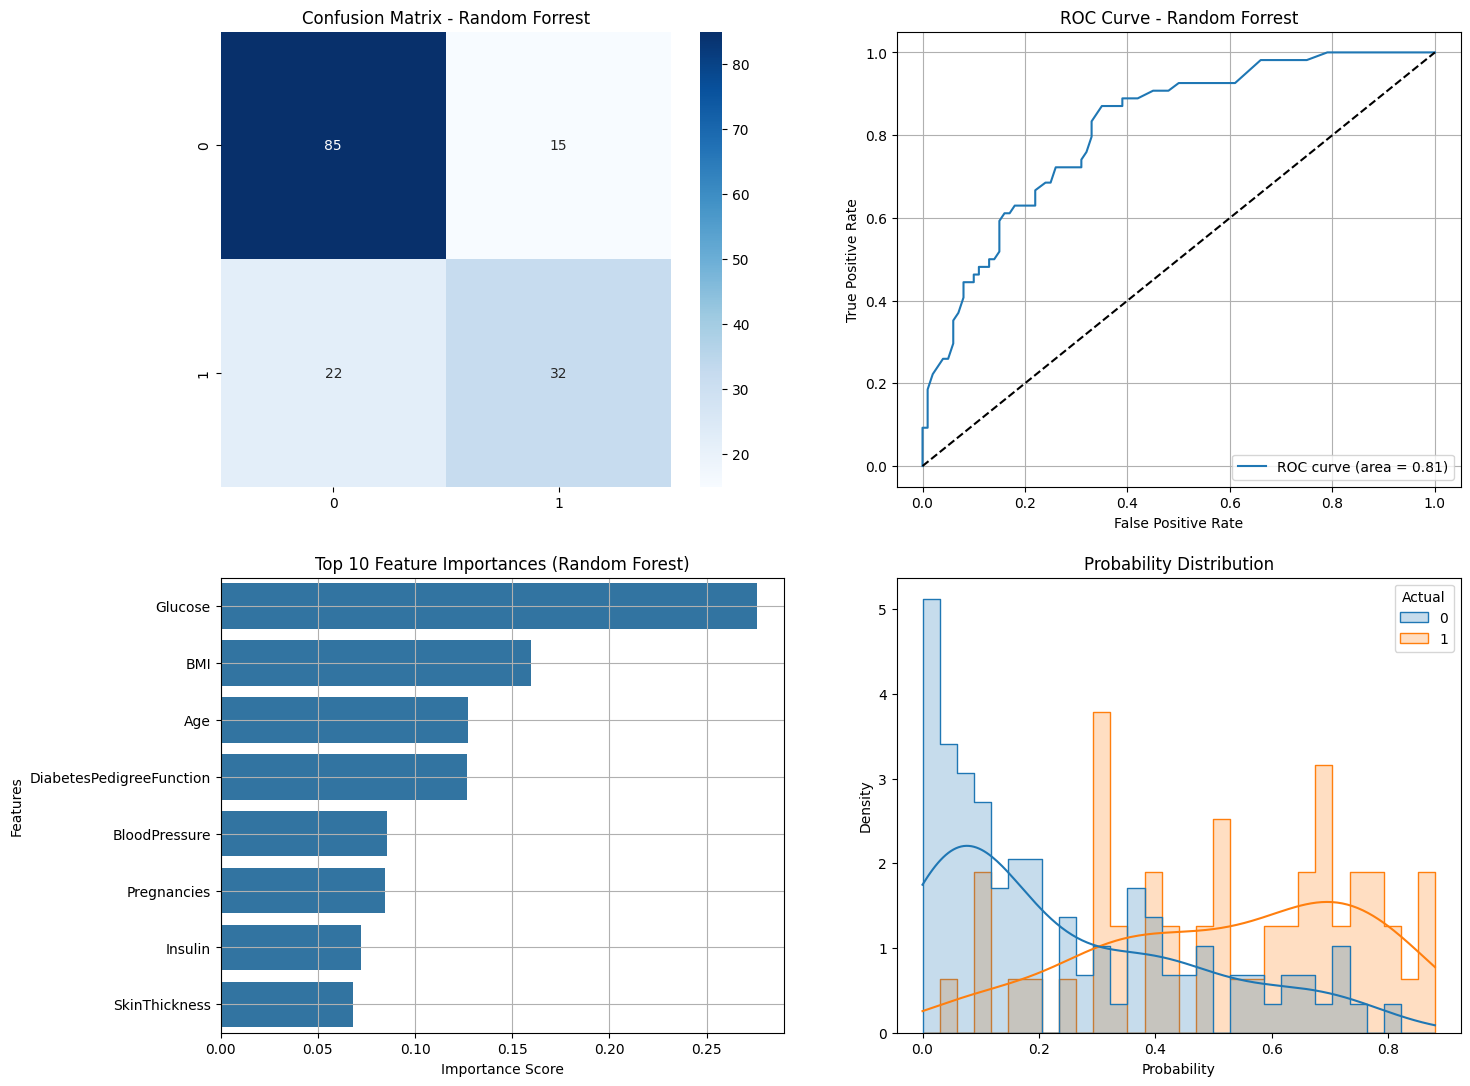

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forrest")

#ROC plot
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Random Forrest")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], ax=axes[2])
axes[2].set_title("Top 10 Feature Importances (Random Forest)")
axes[2].set_xlabel("Importance Score")
axes[2].set_ylabel("Features")
axes[2].grid(True)

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_rf, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# SVM

In [116]:
from sklearn.svm import SVC

In [117]:
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Classification report for SVM:\n", classification_report(y_test, y_pred_svm))


Classification report for SVM:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



### Used Scaled Data SVM

In [118]:
svm.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm.predict(X_test_scaled)
cm_svm_scaled = confusion_matrix(y_test, y_pred_svm_scaled)

print("Classification report for SVM_Scaled:\n", classification_report(y_test, y_pred_svm_scaled))

Classification report for SVM_Scaled:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## SVM Charts

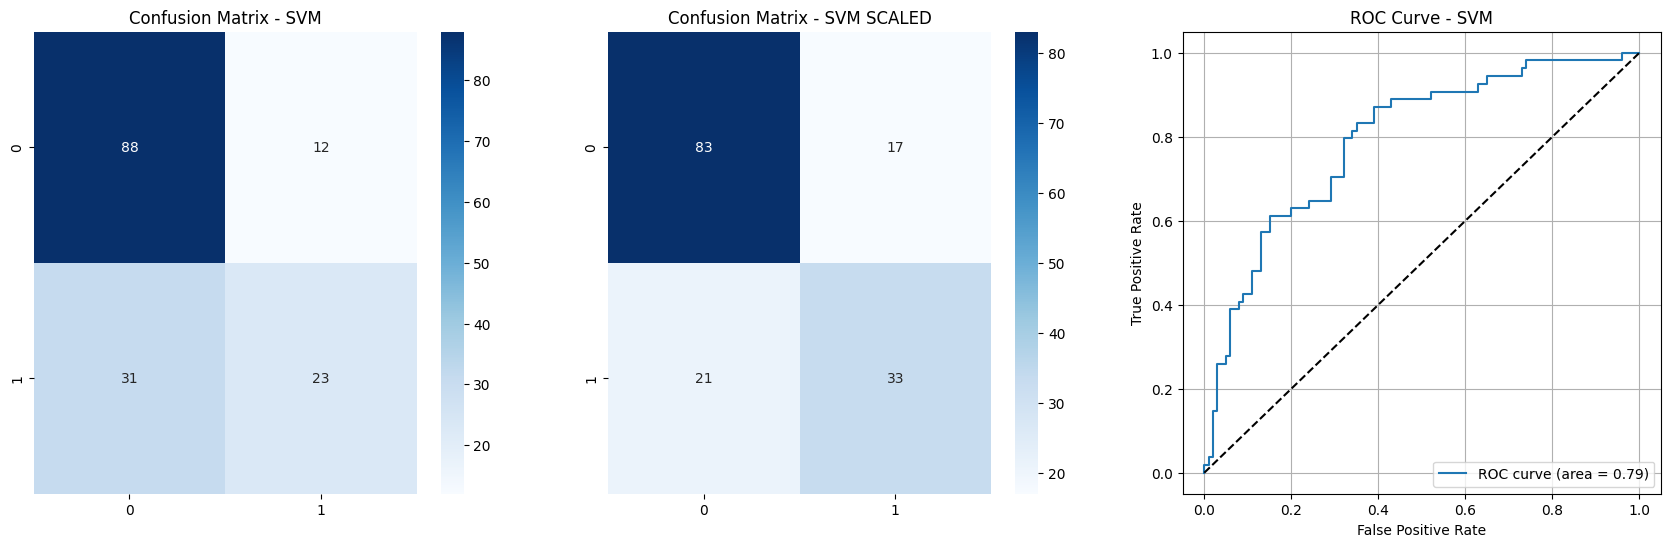

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - SVM")

#confusion matrix scaled heatmap plot
sns.heatmap(cm_svm_scaled, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - SVM SCALED")



#ROC plot
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
axes[2].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[2].plot([0, 1], [0, 1], "k--")  
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve - SVM")
axes[2].legend(loc="lower right")
axes[2].grid(True)









# ADABOOST

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print("Classification report for ADABOOST:\n", classification_report(y_test, y_pred_adaboost))

Classification report for ADABOOST:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



## ADABOOST Charts

Text(0.5, 1.0, 'Probability Distribution')

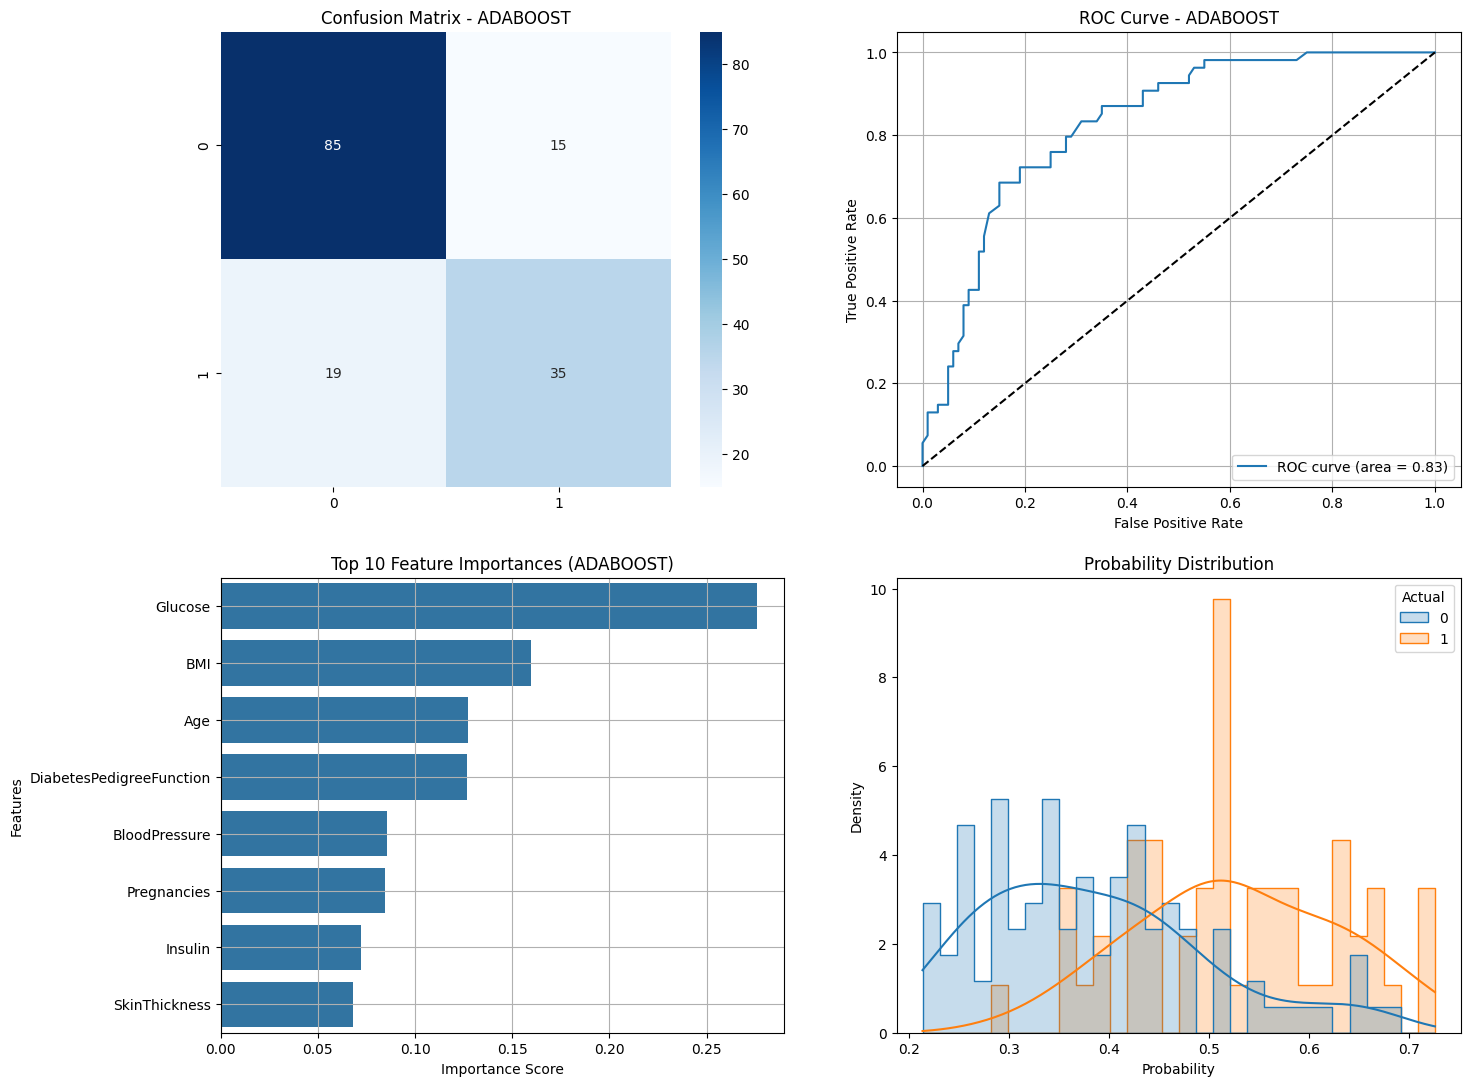

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - ADABOOST")

#ROC plot
y_prob_adaboost = adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_adaboost)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - ADABOOST")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], ax=axes[2])
axes[2].set_title("Top 10 Feature Importances (ADABOOST)")
axes[2].set_xlabel("Importance Score")
axes[2].set_ylabel("Features")
axes[2].grid(True)

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_adaboost, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# XGBOOST

In [123]:
from xgboost import XGBRFClassifier

In [124]:
xgb = XGBRFClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, y_pred_svm)

print("Classification report for XGBOOST:\n", classification_report(y_test, y_pred_xgb))

Classification report for XGBOOST:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



## XGBOOST Charts

Text(0.5, 1.0, 'Probability Distribution')

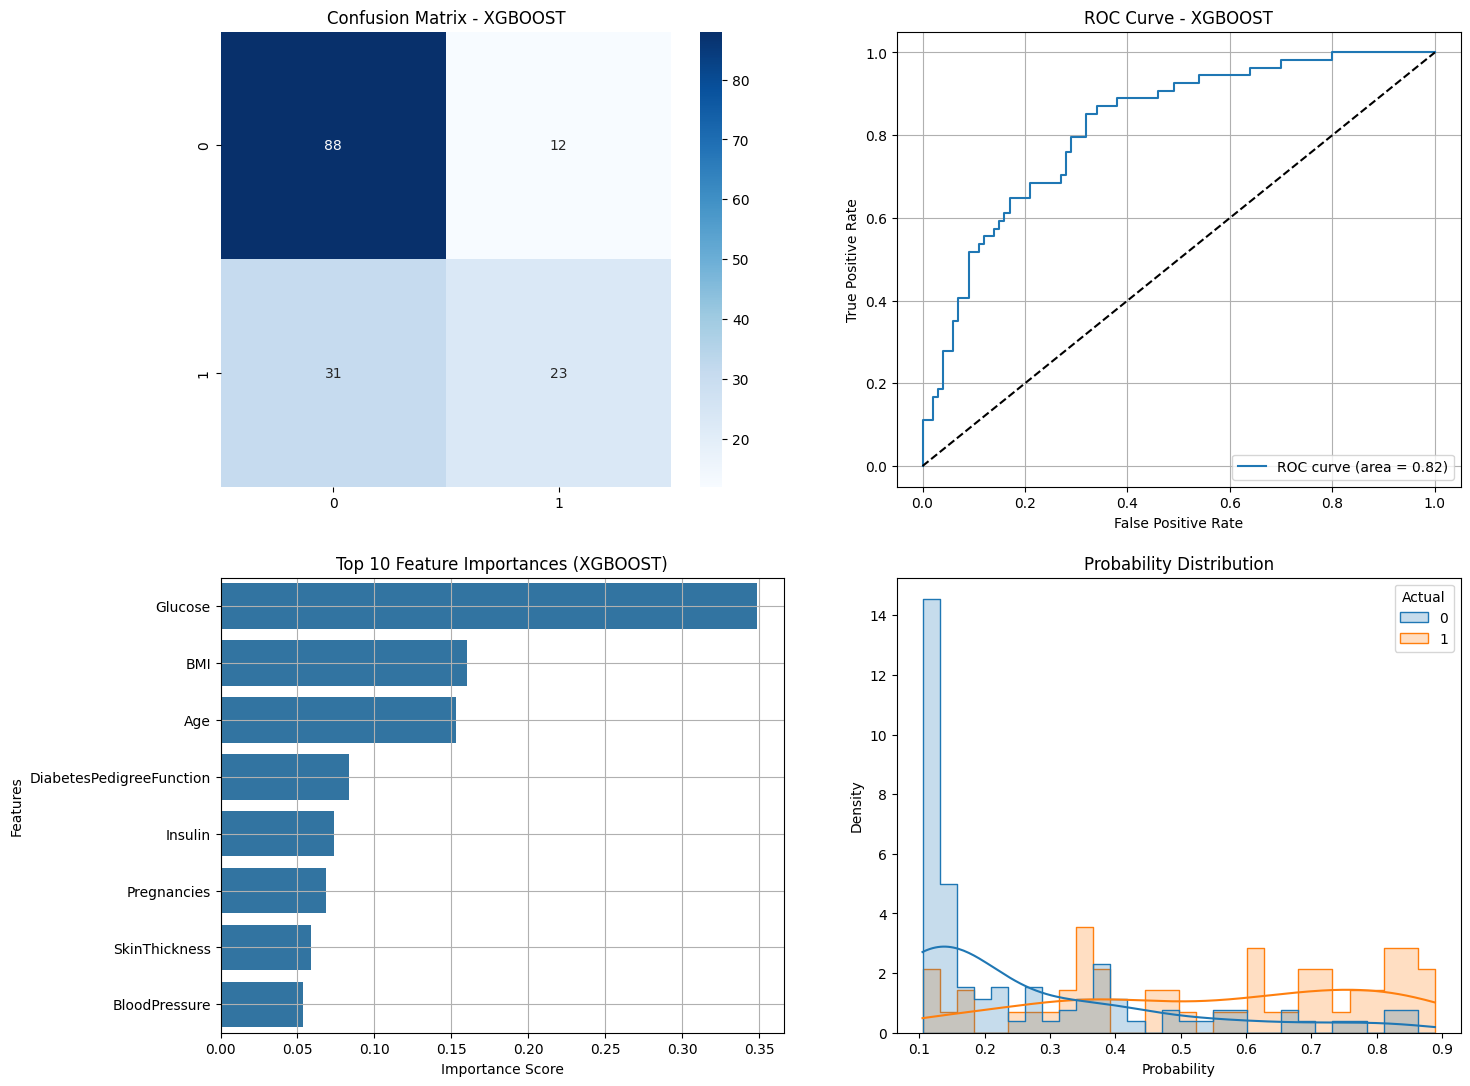

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - XGBOOST")

#ROC plot
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - XGBOOST")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
feature_imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], ax=axes[2])
axes[2].set_title("Top 10 Feature Importances (XGBOOST)")
axes[2].set_xlabel("Importance Score")
axes[2].set_ylabel("Features")
axes[2].grid(True)

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_xgb, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# ANN

In [126]:
from sklearn.neural_network import MLPClassifier

In [127]:
ANN = MLPClassifier()
ANN.fit(X_train, y_train)
y_pred_ANN = ANN.predict(X_test)

cm_ANN = confusion_matrix(y_test, y_pred_ANN)

print("Classification report for ANN:\n", classification_report(y_test, y_pred_ANN))

Classification report for ANN:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       100
           1       0.57      0.76      0.65        54

    accuracy                           0.71       154
   macro avg       0.71      0.72      0.70       154
weighted avg       0.75      0.71      0.72       154



Text(0.5, 1.0, 'Probability Distribution')

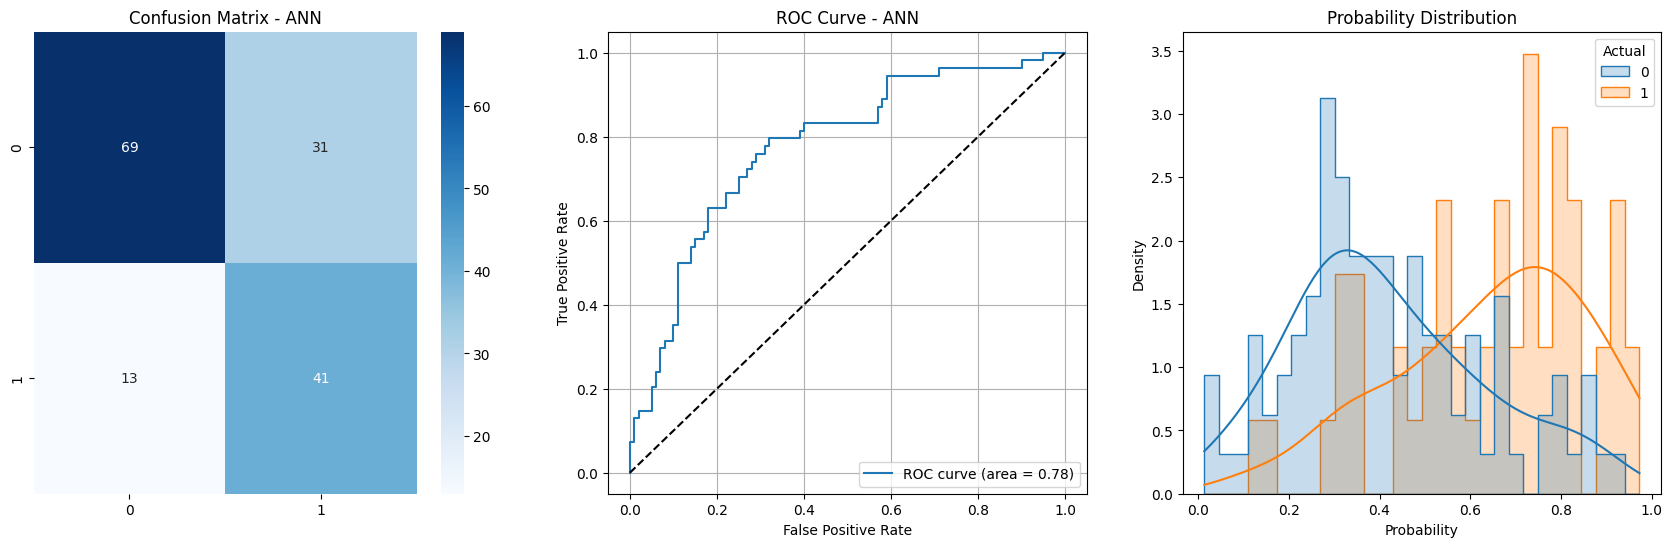

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_ANN, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - ANN")

#ROC plot
y_prob_ANN = ANN.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ANN)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - ANN")
axes[1].legend(loc="lower right")
axes[1].grid(True)

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_ANN, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[2]
)
axes[2].set_title('Probability Distribution')

# K-Means

In [129]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Preprocessing

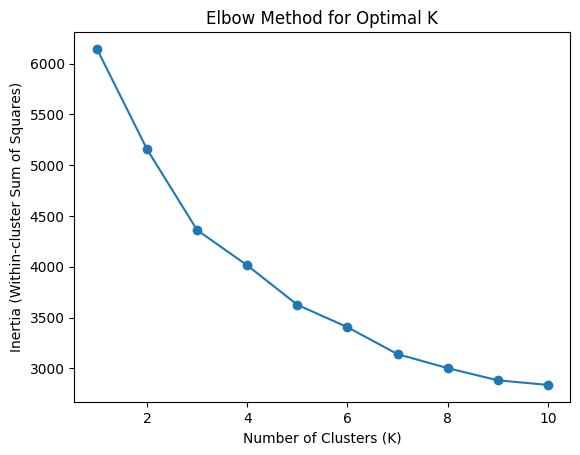

In [130]:
X = df.drop('Outcome', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#finding optimal value for k_means clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

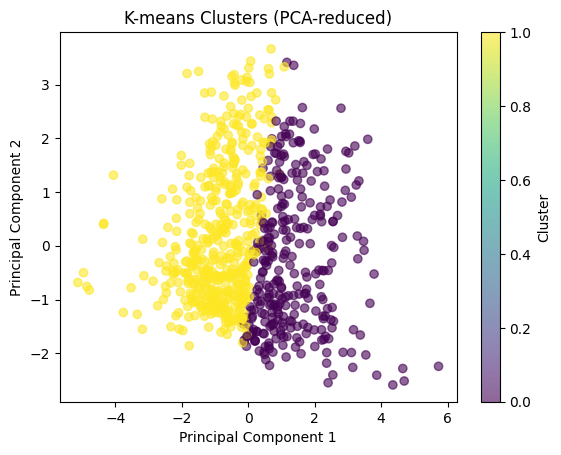

In [131]:
#best value for k
k = 2

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Use scaled data

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters (PCA-reduced)")
plt.colorbar(label="Cluster")
plt.show()



In [132]:
df["Cluster"] = clusters
df["Cluster"] = np.where(df["Cluster"] == 0, "Non-Diabetic", "Diabetic")

print(df.groupby(['Cluster', 'Outcome']).size())

# metric measures how well-separated the clusters are (range: -1 to 1)
silhouette_avg = silhouette_score(X_scaled, clusters)       
print(f"Silhouette Score: {silhouette_avg}")

Cluster       Outcome     
Diabetic      Diabetic        112
              Non-Diabetic    352
Non-Diabetic  Diabetic        156
              Non-Diabetic    148
dtype: int64
Silhouette Score: 0.16457691963383567


In [133]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": y_pred_log_reg,
    "Naive Bayes": y_pred_naive_bayes,
    "KNN (scaled)": y_pred_KNN_scaled,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "Adaboost": y_pred_adaboost,
    "Xgboost": y_pred_xgb,
    "ANN": y_pred_ANN
}

auc_scores = {
    "Logistic Regression": roc_auc_score(y_test, y_prob_log_reg),
    "Naive Bayes": roc_auc_score(y_test, y_prob_naive_bayes),
    "KNN (scaled)": roc_auc_score(y_test, y_prob_KNN),
    "Decision Tree": roc_auc_score(y_test, y_pred_dt),
    "Random Forest": roc_auc_score(y_test, y_prob_rf),
    "SVM": roc_auc_score(y_test, y_prob_svm),
    "Adaboost": roc_auc_score(y_test, y_prob_adaboost),
    "Xgboost": roc_auc_score(y_test, y_prob_xgb),
    "ANN": roc_auc_score(y_test, y_prob_ANN)
}

summary = []
for name, y_pred in models.items():
    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": auc_scores[name]
    })

pd.DataFrame(summary).sort_values(by="AUC", ascending=False)

,Model,Accuracy,F1 Score,AUC
6,Adaboost,0.779221,0.673077,0.829167
0,Logistic Regression,0.714286,0.560000,0.822778
7,Xgboost,0.753247,0.620000,0.820000
4,Random Forest,0.759740,0.633663,0.814722
5,SVM,0.720779,0.516854,0.792407
8,ANN,0.714286,0.650794,0.776296
1,Naive Bayes,0.707792,0.608696,0.772778
2,KNN (scaled),0.694805,0.552381,0.734259
3,Decision Tree,0.740260,0.565217,0.680741
